In [0]:
import os
import time
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.svm import LinearSVC
from skimage import io

In [7]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/data"
x = []
y = []
path = 'content/drive/My Drive/data'
path_new = []
path_data = []
images = []
dir = os.listdir('/content/drive/My Drive/data')
for sub_dir in dir:
  if(sub_dir=='README'):
    continue
  path_new.append(sub_dir)

for loc in path_new:
  loc='/'+path + '/'+loc
  path_data.append(loc)

for paths in path_data:
  for image in os.listdir(paths):
    images.append(image)
#for path1 in path_data:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
README	s11  s14  s17  s2   s22  s25  s28  s30	s33  s36  s39  s5  s8
s1	s12  s15  s18  s20  s23  s26  s29  s31	s34  s37  s4   s6  s9
s10	s13  s16  s19  s21  s24  s27  s3   s32	s35  s38  s40  s7


In [0]:
import numpy as np

X = []
y = []

for sub_dir in os.listdir('/content/drive/My Drive/data'):
    if not os.path.isdir(os.path.join('/content/drive/My Drive/data', sub_dir)):
        continue
        
    label = int(sub_dir[1:])
    for file in os.listdir(os.path.join('/content/drive/My Drive/data', sub_dir)):
        filename = os.path.join('/content/drive/My Drive/data', sub_dir, file)
        image = cv2.imread(filename,0)

        X.append(image)
        y.append(label)
        
X = np.array(X, dtype='float64')
y = np.array(y)


In [9]:
print(np.unique(y))
print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
X.shape: (400, 112, 92), y.shape: (400,)


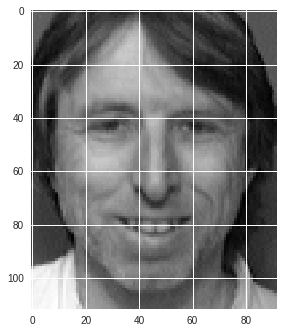

In [10]:
pltimage = plt.imshow(X[1], cmap='gray')
plt.show()

In [11]:
total_images = X.shape[0]
X_dimension = X.shape[1]
Y_dimension = X.shape[2]
X=X.reshape(total_images,(X_dimension*Y_dimension))
print(X.shape)

(400, 10304)


In [12]:
num = 5
x_sample = X[y<=num]
y_sample = y[y<=num]
#print(x_sample, y_sample)
scaler = StandardScaler()
#print(scaler.fit(x_sample))
#print(scaler.mean_)
x_scaler = scaler.fit_transform(x_sample)
print(x_scaler.shape)

(50, 10304)


In [0]:
def PCA_model(X):
  pca = PCA(n_components=2)
  pca.fit(X)
  return pca


In [14]:
pca_model = PCA_model(x_scaler)
x_pca = pca_model.fit_transform(x_scaler)

print("x_pca.shape: %d %d" %(x_pca.shape[0], x_pca.shape[1]))
print("pca_model.explained_variance_ratio: ")
print(pca_model.explained_variance_ratio_)


pca_first= pca_model.components_[0]
pca_second = pca_model.components_[1]
print("pca_componenets: ")
print(pca_first[0], pca_first[1], pca_first[2])
print(pca_second[0], pca_second[1], pca_second[2])
#print(pca_first, pca_second)

x_pca.shape: 50 2
pca_model.explained_variance_ratio: 
[0.19366511 0.15008569]
pca_componenets: 
-0.01985073238994209 -0.019763917876491913 -0.019939368293994578
0.007952031664662506 0.00815504522510419 0.0073176177350096966


1.0663909525729247 1.0617272348885234
-0.11123081345668917 -0.11407051083503528
0.4357762915178504 0.4338704824031997
0.2506574109335398 0.2570566376457327
0.9727857172397243 0.9685313694869816
-0.12211951954041961 -0.1252372031094501
0.765001782368185 0.7616561497627874
-0.021901345319528684 -0.02246048168609257
0.5719651158361126 0.5694637031795728
0.22645207785475213 0.2322333479167171
0.6352083735113492 0.6324303749568069
0.16805257922638867 0.17234292336595836
0.4076846919252286 0.4059017376505286
0.2846067399340701 0.2918726852969987
0.8619774975039005 0.8582077546258636
-0.06828346523210548 -0.07002672657469647
0.33026643759817526 0.328822061666558
0.1359028961621362 0.13937246620255966
0.8659483074558941 0.8621611987735527
-0.018855246376501978 -0.01933661652960502
0.6940788655167321 0.6910434047678675
-0.07273507643725968 -0.07459198640180933
0.8806859813835576 0.8768344194626008
-0.24431007075472636 -0.25054725131527206
0.7676577287986637 0.7643004807680726
-0.138560856252349

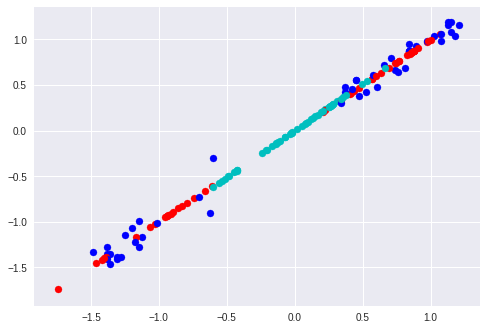

'\nNOT ORTHOGONAL\n'

In [15]:
for i, j in zip(x_pca, x_scaler):
  plt.scatter(pca_first[0]*i[0], pca_first[1]*i[0], color='r')
  plt.scatter(pca_second[0]*i[1], pca_second[1]*i[1], color='c')
  print(pca_first[0]*i[0], pca_first[1]*i[0])
  print(pca_second[0]*i[1], pca_second[1]*i[1])
  plt.scatter(j[0],j[1], color='b')
plt.show()

"""
NOT ORTHOGONAL
"""


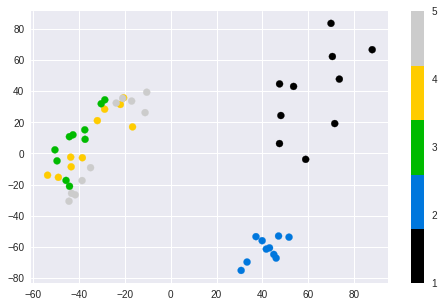

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_sample, cmap = plt.cm.get_cmap('nipy_spectral', num))

cbar = plt.colorbar()
location = np.arange(1, num+1)
cbar.set_ticks(location)

In [0]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3,random_state=42)
x_test2, x_test3, y_test2, y_test3 = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

In [18]:
clf = LogisticRegression(C=0.001)
clf =clf.fit(x_train,y_train)
pred = clf.predict(x_test2)
from sklearn.metrics import accuracy_score

print("accuracy obtained %f percent" %(100*(accuracy_score(pred,y_test2))))
print("predicted labels: ")
print(pred)
print("actual labels:")
print(y_test2)
scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_cross_val_scaled = scaler.transform(x_test2)
x_test_scaled=scaler.transform(x_test3)
y_cross_val = y_test2
y_test = y_test3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy obtained 90.000000 percent
predicted labels: 
[25 23 28 15  2 26 25 20 19 12 29 24  1 17 19 36 12  9 39 33  7 27  4 24
 23 38 37  6 30 31  2 26 27 29 25 39 13 35 40 24 18  7 37 20 40  4  8 11
 14  2 22 24 25 34 33  7  3 30  1  7]
actual labels:
[25 23 14 15  2 26  4 20 19 12 29 24  1 17 14 36 12  9 39 33  7 27  4 24
 23 38 37  6 30 31  2 26 27 29  4 39 13 35 40 24 18  7 37 20 40  4 10 11
 14  2 22 24  4 34 33  7  3 30  1  7]


In [0]:
"Reason for selecting pca_components equal to 2"
def n_comp():
  import numpy as np
  from sklearn.decomposition import PCA
  np.random.seed(0)
  print(x_train.shape[1])
  for i in range(x_train.shape[1]):
    if i>50:
      break
    my_model = PCA(n_components=i+1)
    my_model.fit_transform(x_train)
    print(i+1)
    print (my_model.explained_variance_ratio_)

In [28]:
n_comp()

10304
1
[0.17410952]
2
[0.17410952 0.12846148]
3
[0.17410952 0.12846148 0.0721729 ]
4
[0.17410952 0.12846148 0.0721729  0.05443258]
5
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717  ]
6
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324 ]
7
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837]
8
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02411962]
9
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02411962 0.0201427 ]
10
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02411962 0.0201427  0.01886617]
11
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02411962 0.02014269 0.01886617 0.01438575]
12
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02411962 0.0201427  0.01886618 0.0143857  0.01394814]
13
[0.17410952 0.12846148 0.0721729  0.05443258 0.051717   0.0314324
 0.02455837 0.02

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_scaled)
x_cross_val_pca = pca.transform(x_cross_val_scaled)
x_test_pca = pca.transform(x_test2)
print("x_cross_val_pca.shape: ")
print(x_cross_val_pca.shape)
print("x_test_pca.shape: ")
print(x_test_pca.shape)
print("x_train_pca.shape")
print(x_train_pca.shape)
clf =clf.fit(x_train_pca, y_train)

x_cross_val_pca.shape: 
(60, 237)
x_test_pca.shape: 
(60, 237)
x_train_pca.shape
(280, 237)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
from sklearn.metrics import accuracy_score
print("acurracy obtained after pca_transform: ")
print(100*clf.score(x_cross_val_pca, y_test2))
print(100* clf.score(x_test_pca, y_test))

acurracy obtained after pca_transform: 
81.66666666666667
3.3333333333333335
